#**Trees homework**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

df.head(10)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
5,190,NaN,2484.883986,2008,17.271818
6,240,127.0,3006.542287,2012,13.210412
7,150,239.0,3638.657780,2020,12.848884
8,250,174.0,2714.219310,2016,16.823554
9,150,123.0,3509.036569,2005,12.298355


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [4]:
df.describe(include='all', percentiles=[.01,.05,.25,.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,80.000000,120.000000,170.000000,200.000000,230.000000,280.000000,310.000000,380.000000
horsepower,8996.0,149.657292,29.879555,37.000000,80.000000,101.000000,130.000000,149.000000,170.000000,200.000000,218.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,1841.379222,2180.951872,2666.248985,2993.226296,3334.957039,3819.762217,4177.957153,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2000.000000,2001.000000,2006.000000,2012.000000,2017.000000,2022.000000,2023.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,8.996637,10.762305,13.267459,15.006037,16.707965,19.150022,20.882064,25.967222


Text(0.5, 1.0, 'Distribution of fuel efficiency mpg')

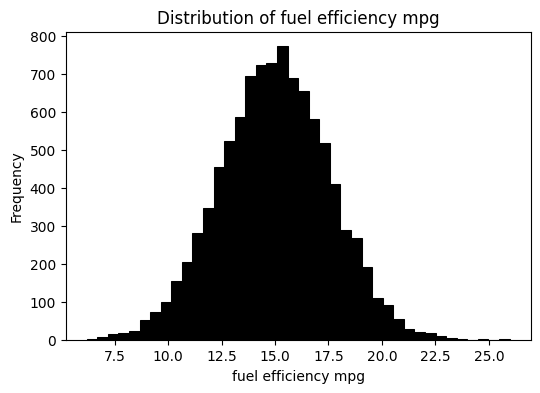

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(df["fuel_efficiency_mpg"], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('fuel efficiency mpg')
plt.title('Distribution of fuel efficiency mpg')